# class_logistic_regression.ipynb

## Data import and test

In [13]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import scipy.stats as st

In [14]:
# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

# Random seed
seed = 42
np.random.seed(seed)
random.seed(seed)

def rocplot(p, y, ax=None, color="C0", label=None):
    """
    Plot the Receiver Operating Characteristic (ROC) curve and compute the AUC.

    Args:
        p (array-like): Predicted probabilities for the positive class.
        y (array-like): True binary class labels (0 or 1).
        ax (matplotlib.axes.Axes, optional): Axis to plot on.
        color (str, optional): Line color.
        label (str, optional): Label for the ROC curve.

    Returns:
        float: AUC
    """
    fpr, tpr, _ = metrics.roc_curve(y, p)
    auc_value = metrics.roc_auc_score(y, p)

    if ax is None:
        ax = plt.gca()

    ax.plot(fpr, tpr, color=color, lw=2, label=f"AUC = {auc_value:.3f}")
    ax.plot([0, 1], [0, 1], "k--", lw=1)
    ax.set_xlim([-0.02, 1.02])
    ax.set_ylim([-0.02, 1.02])
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlabel("False Positive Rate (1 - Specificity)")
    ax.set_ylabel("True Positive Rate (Sensitivity)")
    ax.set_title("ROC Curve")
    ax.grid(True, linestyle="--", alpha=0.5)
    if label or auc_value:
        ax.legend(loc="lower right")

    return auc_value

def confmatplot(y_true, y_pred, ax=None, cmap="Blues"):
    """
    Plot a styled confusion matrix.

    Args:
        y_true (array-like): True class labels.
        y_pred (array-like): Predicted class labels.
        ax (matplotlib.axes.Axes, optional): Axis to plot on.
        cmap (str, optional): Colormap for heatmap.
    """
    cm = metrics.confusion_matrix(y_true, y_pred)
    acc = 100 * cm.diagonal().sum() / cm.sum()
    err = 100 - acc

    if ax is None:
        ax = plt.gca()

    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    ax.set_title(f"Confusion Matrix\nAccuracy: {acc:.1f}%, Error: {err:.1f}%")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(np.arange(cm.shape[1]))
    ax.set_yticks(np.arange(cm.shape[0]))
    ax.set_xticklabels(np.arange(cm.shape[1]))
    ax.set_yticklabels(np.arange(cm.shape[0]))

    # Add counts in cells
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j,
                i,
                f"{cm[i, j]}",
                ha="center",
                va="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=10,
            )

    ax.grid(False)


In [15]:
name_data_file="heart_failure_clinical_records_dataset"

data = pd.read_csv(f"../../raw_data/{name_data_file}.csv", na_values=["?"])

X = data.drop(columns=["DEATH_EVENT"])
y = pd.Categorical(data["DEATH_EVENT"]).codes

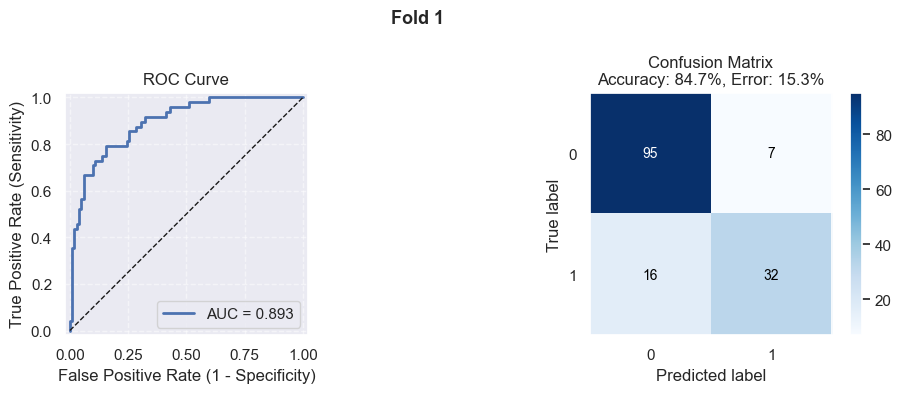

c:\Users\andre\miniforge3\envs\dtu02452\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


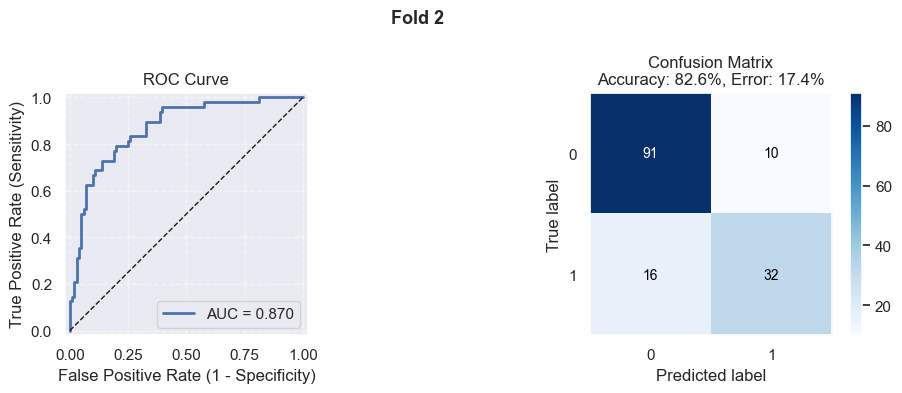

In [17]:
K = 2


CV_kfold = StratifiedKFold(K, shuffle=True)

for fold, (train_index, test_index) in enumerate(CV_kfold.split(X,y)):
    
    X_train, y_train = X.iloc[train_index,:], y[train_index]
    X_test, y_test = X.iloc[test_index,:], y[test_index]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    p = model.predict_proba(X_test)[:,1]

    # Create figure with 2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # ROC curve
    rocplot(p, y_test, ax=axes[0])

    # Confusion matrix
    confmatplot(y_test, y_pred, ax=axes[1])

    fig.suptitle(f"Fold {fold+1}", fontsize=13, fontweight="bold")
    plt.tight_layout()
    plt.show()
